In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [40]:
data1=pd.read_csv("Global_Development_Indicators_2000_2020.csv")
data1.head(5)

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,...,NaN,0,0,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,...,NaN,1,1,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,...,NaN,2,2,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,...,NaN,3,3,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,...,NaN,4,4,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022


In [41]:
selected_columns = ['gdp_usd', 'health_expenditure_pct_gdp', 'school_enrollment_secondary', 
                    'co2_emissions_kt', 'child_mortality', 'life_expectancy']

data = data1[selected_columns]
data=pd.DataFrame(data)

In [42]:
data["gdp_usd"]=data["gdp_usd"].fillna(data["gdp_usd"].mean())

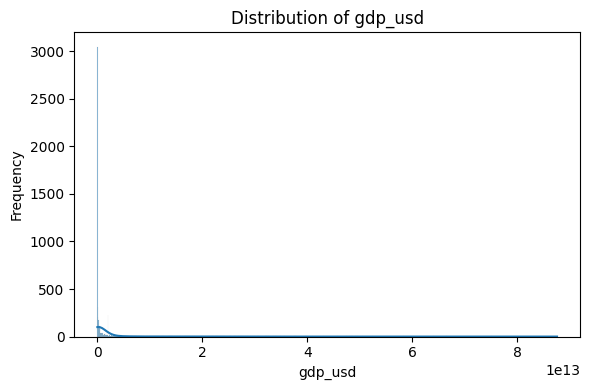

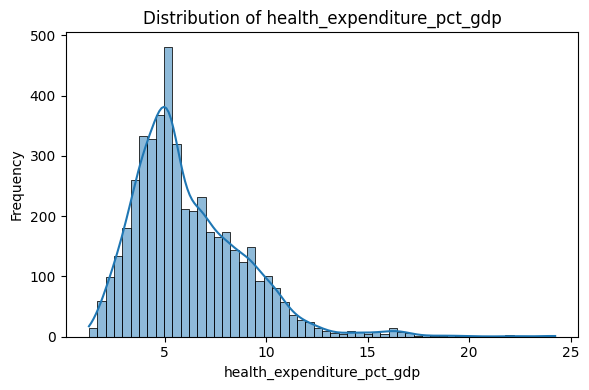

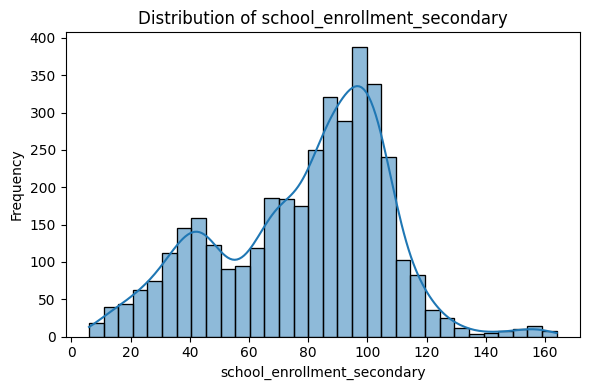

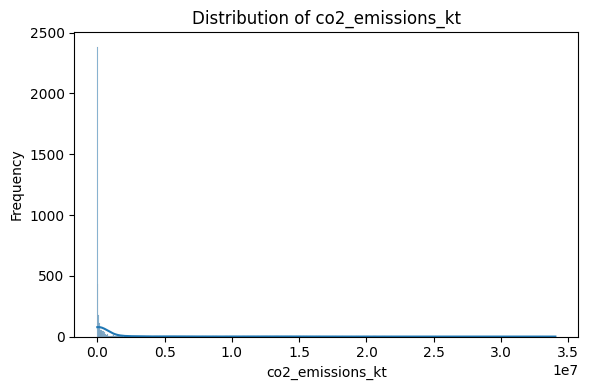

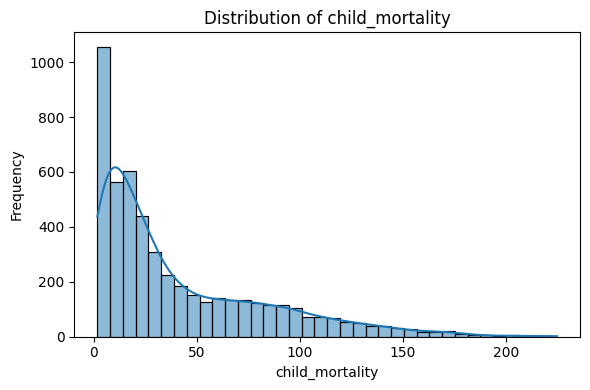

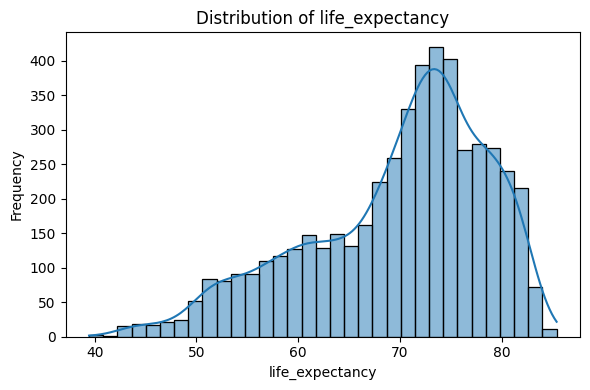

In [43]:
for col in data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [44]:
data["health_expenditure_pct_gdp"]=data["health_expenditure_pct_gdp"].fillna(data["health_expenditure_pct_gdp"].median())

In [45]:
data["child_mortality"]=data["child_mortality"].fillna(data["child_mortality"].median())

In [46]:
data["school_enrollment_secondary"]=data["school_enrollment_secondary"].fillna(data["school_enrollment_secondary"].mean())

In [57]:
data["co2_emissions_kt"]=data["co2_emissions_kt"].fillna(data["co2_emissions_kt"].mean())

In [58]:
data["life_expectancy"]=data["life_expectancy"].fillna(data["life_expectancy"].mean())

In [59]:
data.isnull().sum()

gdp_usd                        0
health_expenditure_pct_gdp     0
school_enrollment_secondary    0
co2_emissions_kt               0
child_mortality                0
life_expectancy                0
dtype: int64

In [60]:
data.duplicated().sum()

0

In [61]:
data=data.drop_duplicates()

In [62]:
x = data.drop(["life_expectancy"],axis=1)
y = data['life_expectancy']

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
models={
    "Random Forest Regressor":RandomForestRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor()
}

In [69]:
result={}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2=r2_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)

    result[name]={
    "R2 Score":r2,
    "MSE":mse
    }

for model_name, metrics in result.items():
    print(f"{model_name}: R2 = {metrics['R2 Score']:.3f}, MSE = {metrics['MSE']:.3f}")

Random Forest Regressor: R2 = 0.956, MSE = 3.175
Decision Tree Regressor: R2 = 0.922, MSE = 5.601
